In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import controls as ctrl
import pandas as pd
import os

# Defining our constants (endowments)

In [2]:
original_task_endowments = ctrl.task_endowments
total_endowment = sum(original_task_endowments)
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()

# defining tax rates
tax_rates = []
for i in range(0,11, 1):
    tax_rates.append(i/10)

    
# defining alternative tax rates 
alt_tax_rates = []
for i in range(0,105, 5):
    alt_tax_rates.append(i/100)


# new parameters
optimal_taxes = [1, 0.85, 0.7, 0.55, 0.4, 0]
income_max_tax = 40
#income_max_tax = 38.7

unique_task_endowments

[9, 15, 25, 40, 80, 125]

# Defining the Payoff Functions

## Payoff Function

In [3]:
def linear_payoff(endowment, slope, tax):
    """Linear payoff function for Money Politics
    
    y=income+slope*t
    """
    
    return endowment+slope*tax

## Highest Payoff Function

In [4]:
# obtaining its intercept
b_highest = (max(unique_task_endowments)-income_max_tax)/(min(optimal_taxes)-max(optimal_taxes))
b_highest

-85.0

## Calculating intersections

In [5]:
intersections_high_function = {} # payoffs when tax rate is the optimal in the highest payoff function

# evaluating payoffs for all the endowments but the max

index = 0 # index for accessing the optimal tax rates
for endowment in unique_task_endowments:
    if endowment != max(unique_task_endowments):
        intersections_high_function[f"endowment_{endowment}"] = linear_payoff(max(unique_task_endowments), b_highest, 
                                                                              optimal_taxes[index])
    else:
        intersections_high_function[f"endowment_{endowment}"] = max(unique_task_endowments)
    index += 1

intersections_high_function

{'endowment_9': 40.0,
 'endowment_15': 52.75,
 'endowment_25': 65.5,
 'endowment_40': 78.25,
 'endowment_80': 91.0,
 'endowment_125': 125}

## Calculating slopes

In [6]:
list_of_slopes = {}

# evaluating payoffs for all the endowments but the max

index = 0 # index for accessing the optimal tax rates
for endowment in unique_task_endowments:
    
    if endowment != max(unique_task_endowments):
        current_intersection = intersections_high_function[f"endowment_{endowment}"]
        optimal_tax = optimal_taxes[index]
        list_of_slopes[f"endowment_{endowment}"] = (endowment - current_intersection)/(0 - optimal_tax)
    
    else:
        list_of_slopes[f"endowment_{endowment}"] = b_highest
        
    index += 1

list_of_slopes

{'endowment_9': 31.0,
 'endowment_15': 44.411764705882355,
 'endowment_25': 57.85714285714286,
 'endowment_40': 69.54545454545455,
 'endowment_80': 27.5,
 'endowment_125': -85.0}

# Obtaining Final Payoffs

## Calculations for individual plots

In [7]:
final_payoffs = {}

endowment_index = 0
for endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    endowment_string = f"endowment_{endowment}"
    current_slope = list_of_slopes[endowment_string]
    current_intersection = intersections_high_function[endowment_string]
    final_payoffs[endowment_string] = [] # list with all the final_payoffs for a player
    
    print("endowment = ", endowment)
    for tax_rate in tax_rates: # calculating all the final payoffs for an specific player
        print("tax rate = ", tax_rate)
        current_final_payoff = linear_payoff(endowment, slope=current_slope, tax=tax_rate)
        print("current_final_payoff = ", current_final_payoff)
        final_payoffs[endowment_string].append(round(current_final_payoff, 3))
        index += 1
        print("---")
        
    endowment_index += 1
    print("---------------------")
#final_payoffs

endowment =  9
tax rate =  0.0
current_final_payoff =  9.0
---
tax rate =  0.1
current_final_payoff =  12.1
---
tax rate =  0.2
current_final_payoff =  15.2
---
tax rate =  0.3
current_final_payoff =  18.299999999999997
---
tax rate =  0.4
current_final_payoff =  21.4
---
tax rate =  0.5
current_final_payoff =  24.5
---
tax rate =  0.6
current_final_payoff =  27.599999999999998
---
tax rate =  0.7
current_final_payoff =  30.7
---
tax rate =  0.8
current_final_payoff =  33.8
---
tax rate =  0.9
current_final_payoff =  36.900000000000006
---
tax rate =  1.0
current_final_payoff =  40.0
---
---------------------
endowment =  15
tax rate =  0.0
current_final_payoff =  15.0
---
tax rate =  0.1
current_final_payoff =  19.441176470588236
---
tax rate =  0.2
current_final_payoff =  23.88235294117647
---
tax rate =  0.3
current_final_payoff =  28.323529411764707
---
tax rate =  0.4
current_final_payoff =  32.76470588235294
---
tax rate =  0.5
current_final_payoff =  37.205882352941174
---
tax r

## Calculations for combined plots

In [8]:
comb_final_payoffs = {}

endowment_index = 0
for endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    endowment_string = f"endowment_{endowment}"
    current_slope = list_of_slopes[endowment_string]
    current_intersection = intersections_high_function[endowment_string]
    comb_final_payoffs[endowment_string] = [] # list with all the final_payoffs for a player
    
    print("endowment = ", endowment)
    for tax_rate in alt_tax_rates: # calculating all the final payoffs for an specific player
        print("tax rate = ", tax_rate)
        current_final_payoff = linear_payoff(endowment, slope=current_slope, tax=tax_rate)
        print("current_final_payoff = ", current_final_payoff)
        comb_final_payoffs[endowment_string].append(round(current_final_payoff, 3))
        index += 1
        print("---")
        
    endowment_index += 1
    print("---------------------")
#final_payoffs

endowment =  9
tax rate =  0.0
current_final_payoff =  9.0
---
tax rate =  0.05
current_final_payoff =  10.55
---
tax rate =  0.1
current_final_payoff =  12.1
---
tax rate =  0.15
current_final_payoff =  13.649999999999999
---
tax rate =  0.2
current_final_payoff =  15.2
---
tax rate =  0.25
current_final_payoff =  16.75
---
tax rate =  0.3
current_final_payoff =  18.299999999999997
---
tax rate =  0.35
current_final_payoff =  19.85
---
tax rate =  0.4
current_final_payoff =  21.4
---
tax rate =  0.45
current_final_payoff =  22.950000000000003
---
tax rate =  0.5
current_final_payoff =  24.5
---
tax rate =  0.55
current_final_payoff =  26.05
---
tax rate =  0.6
current_final_payoff =  27.599999999999998
---
tax rate =  0.65
current_final_payoff =  29.150000000000002
---
tax rate =  0.7
current_final_payoff =  30.7
---
tax rate =  0.75
current_final_payoff =  32.25
---
tax rate =  0.8
current_final_payoff =  33.8
---
tax rate =  0.85
current_final_payoff =  35.349999999999994
---
tax ra

# Plotting the functions

<IPython.core.display.Javascript object>


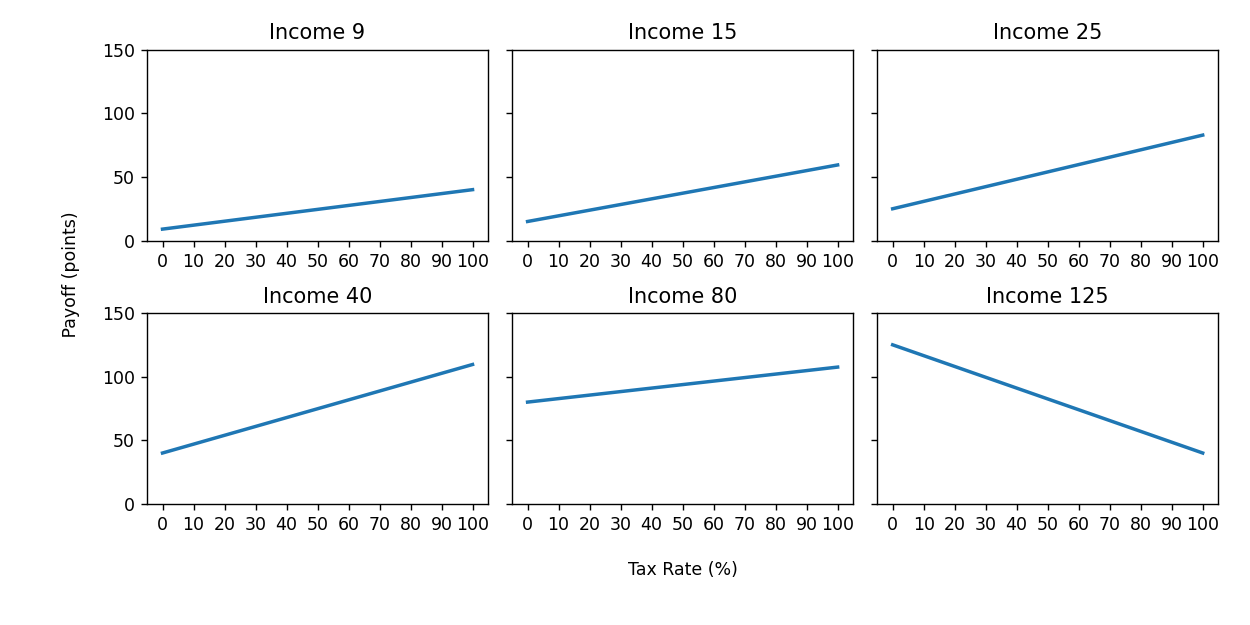

In [9]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each endowment level

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"endowment_{task_endowment}"], linewidth = 2)
    
    axs[n_axis-1].set_ylim(0, 150) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   
    
# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=15) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates]) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('..\_static\MoneyPolitics\Income plots (Linear).png')

<IPython.core.display.Javascript object>


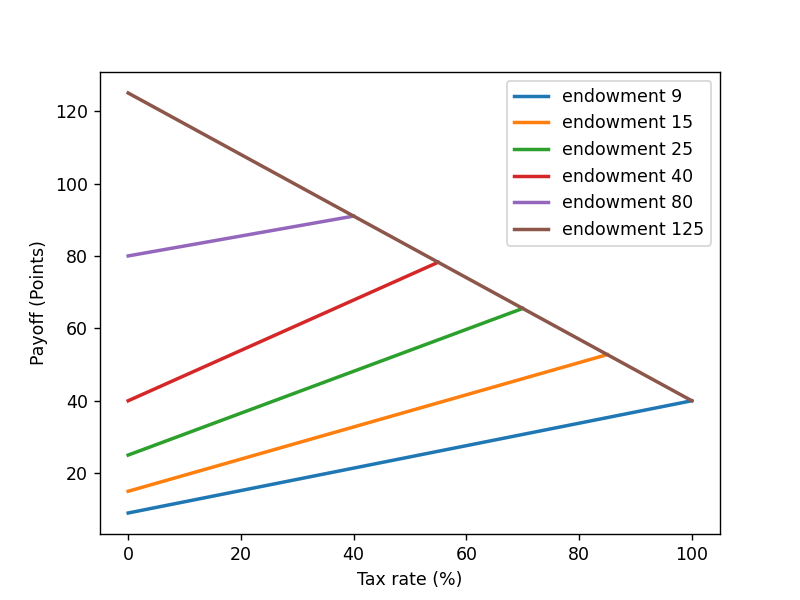

In [10]:
xvals = np.array([tax_rate*100 for tax_rate in alt_tax_rates])

xvals_dict = {}
plots_dict = {}

index = 0 # index for calling the optimal tax rate
for endowment in unique_task_endowments:
    if endowment != max(unique_task_endowments):
        xvals_dict[f"endowment_{endowment}"] = xvals[xvals <= optimal_taxes[index]*100]
    else:
        xvals_dict[f"endowment_{endowment}"] = xvals
    index += 1

    
# xvals_dict
fig1, ax1 = plt.subplots()

index = 0 # index for calling the optimal tax rate
for endowment in unique_task_endowments:
    endowment_string = f"endowment_{endowment}"
    
    if endowment != max(unique_task_endowments):
        length_xvals = len(xvals_dict[endowment_string])
        plots_dict[endowment_string], = ax1.plot(xvals_dict[endowment_string], comb_final_payoffs[endowment_string][:length_xvals], linewidth = 2)
    else:
        plots_dict[endowment_string], = ax1.plot(xvals_dict[endowment_string], comb_final_payoffs[endowment_string], linewidth = 2)
        
    index += 1

ax1.legend([plots_dict[f"endowment_{endowment}"] for endowment in unique_task_endowments], 
           [f"endowment {endowment}" for endowment in unique_task_endowments],
           loc='upper right')
ax1.set_xlabel('Tax rate (%)')
ax1.set_ylabel('Payoff (Points)')
plt.show()

fig1.savefig('..\_static\MoneyPolitics\Linear payoffs combined.png')